# Utilisation de pywavelets sur un stack d'images

## Import des images à traiter

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
import copy as cp

In [2]:
##Path selection
path=r"C:\Users\ZARATHOUSTRA\workspace\BioStacks\BrainZebrafish"
os.chdir(path)

#getting the numbers of the images
directoryContent=os.listdir(path)
imageName=directoryContent[0]
print(imageName)

numberStart=16
numberEnd=-4
imageName[numberStart:numberEnd]

for i in range(len(directoryContent)) :
    directoryContent[i]=int(directoryContent[i][16:-4])

16_07_27_S1_Reg_1.tif


In [3]:
## Selection of the images
startImage=1074 #name in the directory
nImages=120

startIndex=directoryContent.index(startImage)

if len(directoryContent)<startIndex+nImages :
    print('Warning index out of range')

In [4]:
## Preallocation
#select the first image
im=plt.imread(imageName[0:16]+str(startImage)+imageName[-4:])

matrixFormat=list(np.shape(np.array(im)))+[nImages]
stack=np.zeros(tuple(matrixFormat),dtype=str(im.dtype))

## get the selected images in stack
for i in range(nImages):
    number=directoryContent[startIndex+i]
    stack[:,:,i]=plt.imread(imageName[0:16]+str(number)+imageName[-4:])

In [5]:
im.dtype

dtype('uint16')

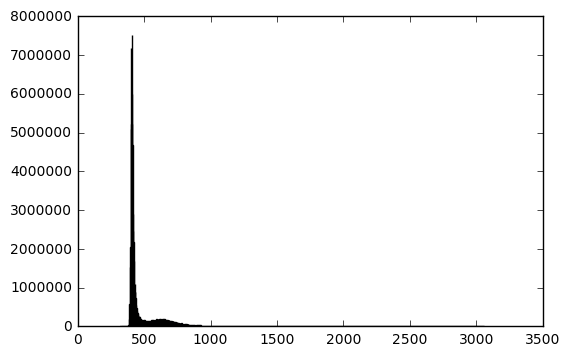

In [6]:
plt.hist(stack.reshape(np.size(stack)),1000)
plt.show()

On doit pouvoir stocker les nombres sur 8 bits sans perdre d'information

## Travail sur une image

In [7]:
image=stack[:,:,0]

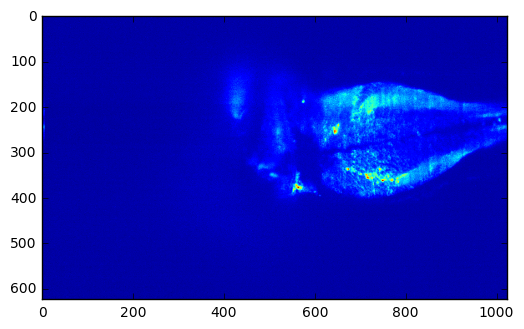

In [8]:
plt.imshow(image)
plt.show()

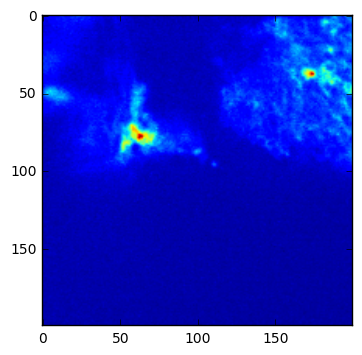

In [9]:
plt.imshow(image[300:500,500:700])
plt.show()

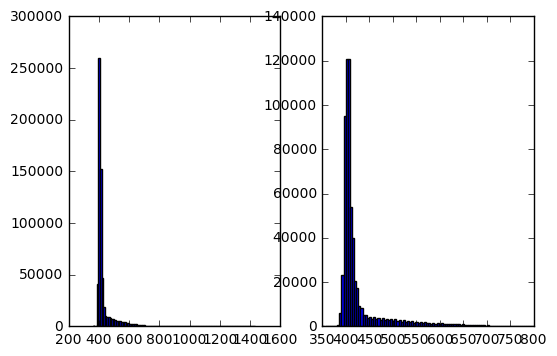

In [10]:
plt.subplot(121)
plt.hist(image.reshape(np.size(image)),100)
plt.subplot(122)
plt.hist(image.reshape(np.size(image)),100,range=[350,800])
plt.show()

In [11]:
## La conversion de 16 à 8 bits se ferait elle sans pertes ?
# on soustrait la valeur la plus faible
image8bit=image-np.ones(image.shape,dtype=str(image.dtype))*np.amin(image)

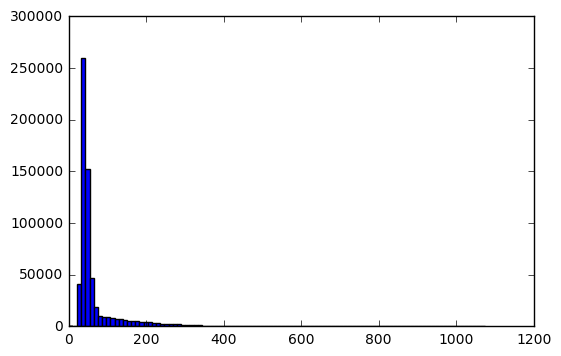

In [12]:
plt.hist(image8bit.reshape(np.size(image8bit)),100)
plt.show()
#http://stackoverflow.com/questions/11337499/how-to-convert-an-image-from-np-uint16-to-np-uint8

On voit qu'on a plus que 512 valeurs différentes, le passage à 8 bits se ferait avec perte mais a priori peu, il faudrait voir si c'est acceptable et le faire en amont.

Petit problème, les coefficients d'ondelettes sont des float, si on a autant de coefficients que de pixels l'espace de stockage de l'image transformée risque d'être bien plus grande que celui de l'image originale.

## Wavelet

### Transformation d'image 

In [13]:
path=r"C:\Users\ZARATHOUSTRA\workspace\BioStacks\BrainZebrafish"
os.chdir(path)

image=plt.imread(path+'/16_07_27_S1_Reg_3300.tif')

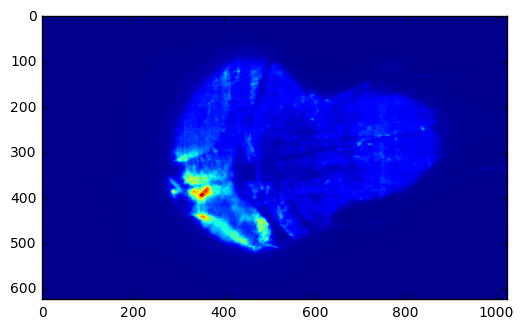

In [14]:
plt.imshow(image)
plt.show()

In [15]:
cA, cD = pywt.dwt(np.array([1, 2, 3, 4]), 'haar')
a=pywt.idwt(cA,cD,'haar')
print(a)

[ 1.  2.  3.  4.]


In [16]:
print(cA)
print(cD)

[ 2.12132034  4.94974747]
[-0.70710678 -0.70710678]


In [17]:
cA, cD = pywt.dwt(np.array([[[1, 2, 3, 4],[3,2,6,9]],[[1, 2, 3, 4],[3,2,6,9]]]), 'haar')
a=pywt.idwt(cA,cD,'haar')
print(a)

[[[ 1.  2.  3.  4.]
  [ 3.  2.  6.  9.]]

 [[ 1.  2.  3.  4.]
  [ 3.  2.  6.  9.]]]


In [18]:
avImage,detailsImage=pywt.dwt(image,'haar')

In [19]:
print(image.shape)
print(avImage.shape)
print(detailsImage.shape)
print(type(avImage))
print(type(detailsImage))

(624, 1024)
(624, 512)
(624, 512)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
invImage=pywt.idwt(avImage,detailsImage,'haar')

In [21]:
invImage.shape

(624, 1024)

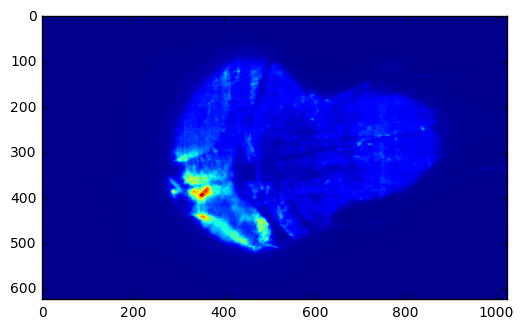

In [22]:
plt.imshow(invImage)
plt.show()

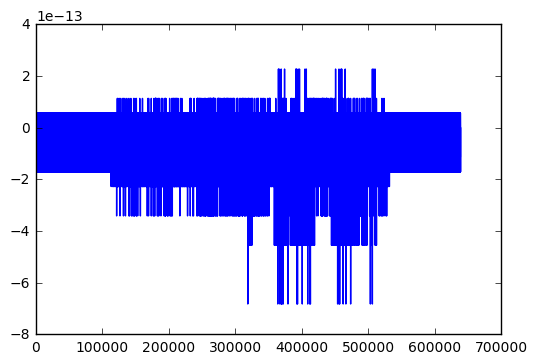

In [23]:
plt.plot(image.reshape(image.size)-invImage.reshape(invImage.size))
plt.show()

In [24]:
print(np.mean(avImage))
print(np.std(avImage))
print(np.mean(detailsImage))
print(np.std(detailsImage))

694.728612366
246.448006076
-0.000794556710881
10.5320961713


In [25]:
invSimplifiedImage=pywt.idwt(avImage,None,'haar')

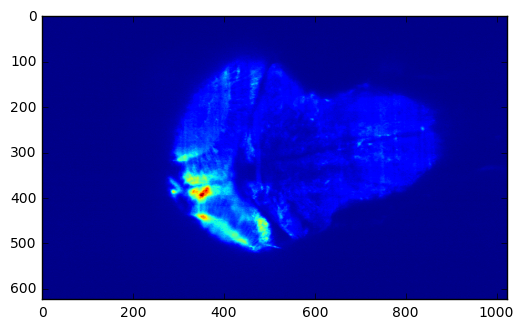

In [26]:
plt.imshow(invSimplifiedImage)
plt.show()

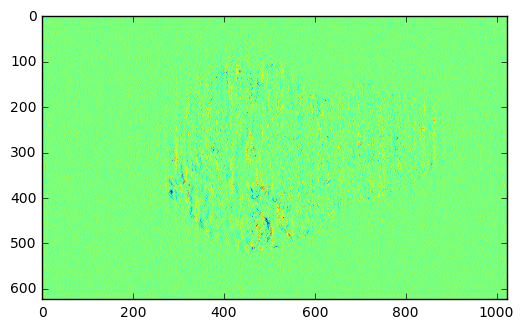

In [27]:
plt.imshow(image/invSimplifiedImage)
plt.show()

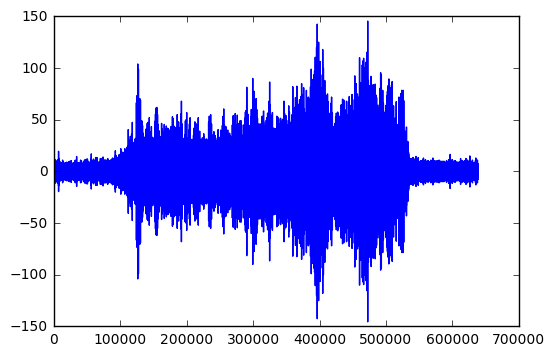

In [28]:
plt.plot(image.reshape(image.size)-invSimplifiedImage.reshape(image.size))
plt.show()

In [29]:
inverseDetailsImage=pywt.idwt(detailsImage,None,'haar')

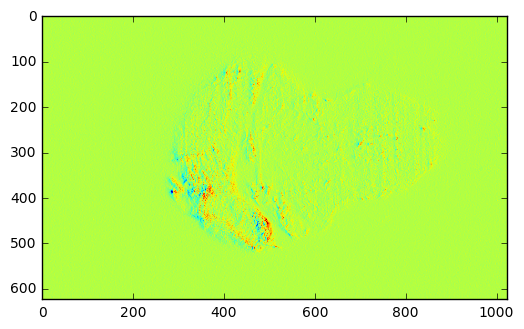

In [30]:
plt.imshow(inverseDetailsImage)
plt.show()

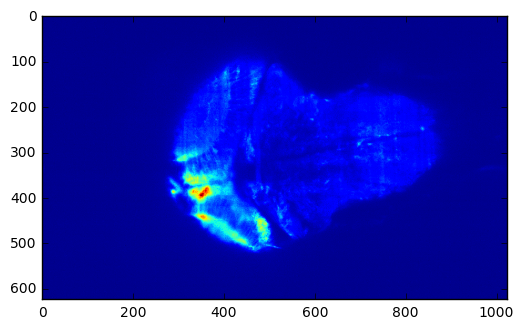

In [31]:
plt.imshow(image-inverseDetailsImage)
plt.show()

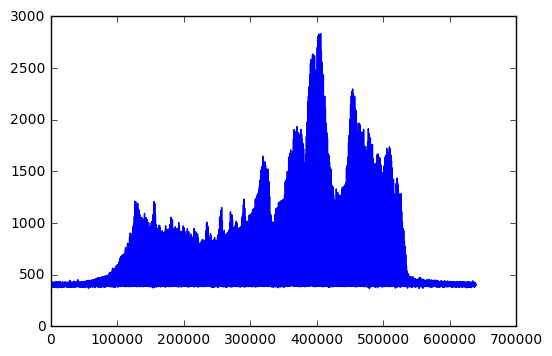

In [32]:
plt.plot((image-inverseDetailsImage).reshape(image.size))
plt.show()

### Transformation + simplification

In [33]:
path=r"C:\Users\ZARATHOUSTRA\workspace\BioStacks\BrainZebrafish"
os.chdir(path)

image=plt.imread(path+'/16_07_27_S1_Reg_3300.tif')

In [34]:
avImage,deImage=pywt.dwt(image,'haar')

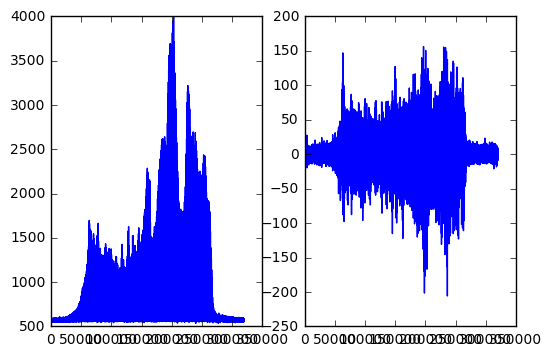

In [35]:
plt.subplot(121)
plt.plot(avImage.reshape(avImage.size))
plt.subplot(122)
plt.plot(deImage.reshape(avImage.size))
plt.show()

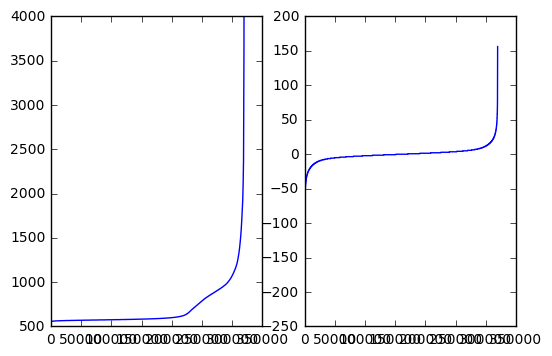

In [36]:
plt.subplot(121)
plt.plot(np.sort(avImage.reshape(avImage.size)))
plt.subplot(122)
plt.plot(np.sort(deImage.reshape(avImage.size)))
plt.show()

In [37]:
thresholdAv=530
thresholdDe=10

Bien prendre les valeurs absolues pour les seuils

In [38]:
print(np.amin(avImage))
print(np.amax(avImage))

533.865619796
3994.44620692


In [39]:
avSimplification=cp.copy(avImage)
deSimplification=cp.copy(deImage)

# voir la syntaxe sous numpy pour la gestion des bouléens, à la hache :
avSimplification=avSimplification-np.amin(avSimplification)
avSimplification[avSimplification<thresholdAv]=None

#deSimplification[np.array(deSimplification<thresholdDe) * np.array(deSimplification>0)]=thresholdDe
#deSimplification[np.array(deSimplification>thresholdDe) * np.array(deSimplification<0)]=-thresholdDe

reconstructionSimplification=pywt.idwt(avSimplification,deSimplification,'haar')

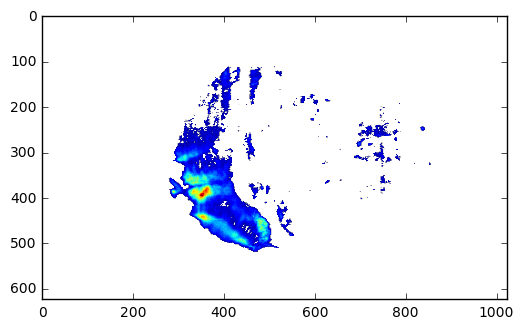

In [40]:
plt.imshow(reconstructionSimplification)
plt.show()

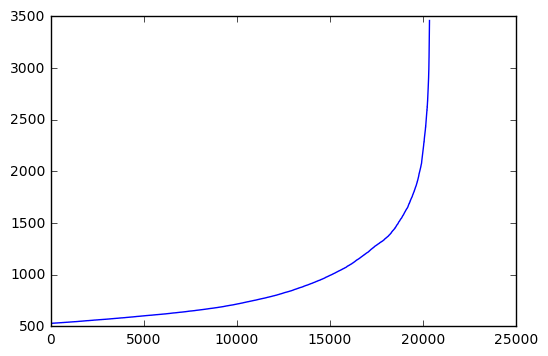

In [41]:
plt.plot(np.sort(avSimplification.reshape(avImage.size)))
plt.show()

In [42]:
avSimplification[0,0]

nan

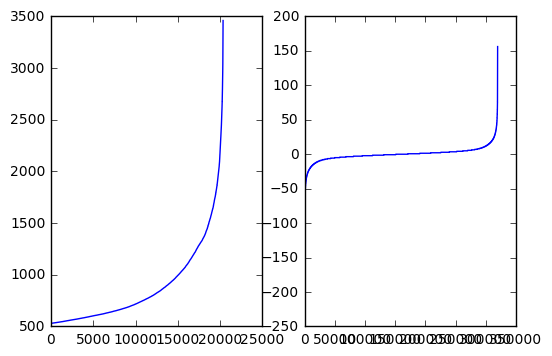

In [43]:
plt.subplot(121)
plt.plot(np.sort(avSimplification.reshape(avSimplification.size)))
plt.subplot(122)
plt.plot(np.sort(deSimplification.reshape(deSimplification.size)))
plt.show()

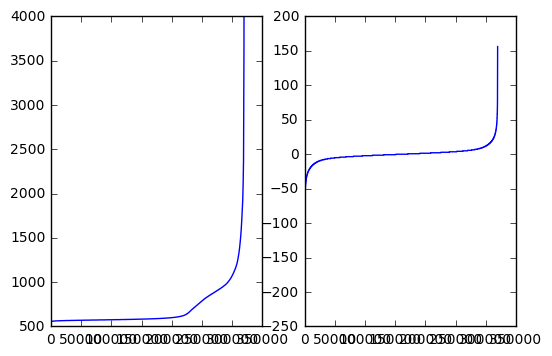

In [44]:
#warning les modifications ont aussi changé les données d'oriigine, utiliser le module cp
plt.subplot(121)
plt.plot(np.sort(avImage.reshape(avImage.size)))
plt.subplot(122)
plt.plot(np.sort(deImage.reshape(avImage.size)))
plt.show()

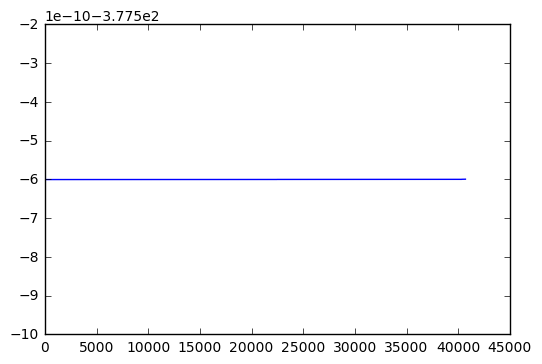

In [45]:
plt.plot(np.sort(reconstructionSimplification.reshape(reconstructionSimplification.size)-image.reshape(image.size)))
plt.show()

In [ ]:
help(cp)

Help on module copy:

NAME
    copy - Generic (shallow and deep) copying operations.

DESCRIPTION
    Interface summary:
    
            import copy
    
            x = copy.copy(y)        # make a shallow copy of y
            x = copy.deepcopy(y)    # make a deep copy of y
    
    For module specific errors, copy.Error is raised.
    
    The difference between shallow and deep copying is only relevant for
    compound objects (objects that contain other objects, like lists or
    class instances).
    
    - A shallow copy constructs a new compound object and then (to the
      extent possible) inserts *the same objects* into it that the
      original contains.
    
    - A deep copy constructs a new compound object and then, recursively,
      inserts *copies* into it of the objects found in the original.
    
    Two problems often exist with deep copy operations that don't exist
    with shallow copy operations:
    
     a) recursive objects (compound objects that, directly 

### Et en 3D ?

In [ ]:
# ici le stack correspond à une succession d'images 2D, pas de considération quant au temps
av3DImage,de3DImage=pywt.dwt(stack,'haar')

In [ ]:
print(av3DImage.shape)
print(de3DImage.shape)


In [ ]:
inverse3DImage=pywt.idwt(av3DImage,de3DImage,'haar')

In [ ]:
plt.plot((stack-inverse3DImage).reshape(stack.size))
plt.show()

In [ ]:
###Et en 4D ?

In [ ]:
# Nombre d'images par objet 3D
size3D=20

In [ ]:
#reshape the stack as a 4D object
stack4D=stack[:,:,0:stack.shape[2]-stack.shape[2]%size3D].reshape((stack.shape[0],stack.shape[1],size3D,stack.shape[2]//size3D))

In [ ]:
stack4D.shape

In [ ]:
av4D,de4D=pywt.dwt(stack4D,'haar')

In [ ]:
print(av4D.shape)
print(de4D.shape)

## Application aux variations

### Création du stack

In [ ]:
# Get the numbefs of the images in the directory

##Path selection
path=r"C:\Users\ZARATHOUSTRA\workspace\BioStacks\BrainZebrafish"
os.chdir(path)

##getting the numbers of the images
directoryContent=os.listdir(path)
imageName=directoryContent[0]
print(imageName)

numberStart=16
numberEnd=-4
imageName[numberStart:numberEnd]

for i in range(len(directoryContent)) :
    directoryContent[i]=int(directoryContent[i][16:-4])
directoryContent=np.array(directoryContent)
directoryContent=np.sort(directoryContent)

In [ ]:
directoryContent[-1]

In [ ]:
diff=directoryContent[1:-1]-directoryContent[0:-2]
plt.figure()
plt.plot(diff!=1)
plt.show()

np.sum(diff!=1)

Solution 1

In [ ]:
# !Solution 1 : select a number and take the following nImages 
# -> Pb si on a des irrégularités dans les numéros d'image
#-> Ici ok (voir ci-dessus) car à aprt pour le début de session, les sauts d'indices
# sont 'en phase' avec les pas de temps (40 images)
## Selection of the images
startImage=1074 #name in the directory
nImages=120

startIndex=directoryContent.index(startImage)

if len(directoryContent)<startIndex+nImages :
    print('Warning index out of range')
    
## Preallocation
#select the first image
im=plt.imread(imageName[0:16]+str(startImage)+imageName[-4:])

matrixFormat=list(np.shape(np.array(im)))+[nImages]
stack=np.zeros(tuple(matrixFormat),dtype=str(im.dtype))

## get the selected images in stack
for i in range(nImages):
    number=directoryContent[startIndex+i]
    stack[:,:,i]=plt.imread(imageName[0:16]+str(number)+imageName[-4:])    

Solution 2

In [ ]:
# Solution 2 : select a number of beginning and end
# replace missing images by empty matrixes
## Selection of the images
startId=1067 #name in the directory
#endId=1154 #idem
zSize=41 # nombre d'images par volume, #peut-être 4& à cause du décalage de 1 à chaque pas de temps
nVolumes=20
endId=startId+zSize*nVolumes


# crops the last images so that we only have a succession of full volumes
nVolumes=(endId-startId+1)//zSize # number of full volumes
endId=startId-1+nVolumes*zSize


### print shapes
print(startId,endId,zSize,nVolumes)
print(directoryContent[-1])

if directoryContent[-1]<endId :
    print('Warning Image out of directory')

else : 
    # preallocation, we take the first image
    startIdReal=startId  
    while startIdReal not in directoryContent and startIdReal!=endId : # si le num de début fait partie des imagaes sautées
        startIdeReal+=1
        im=plt.imread(imageName[0:16]+str(startIdReal)+imageName[-4:])
        
        
    print(startId,startIdReal)
    
    
    #Format of the stack
    matrixFormat=list(np.shape(np.array(im)))+[zSize]+[nVolumes]
    stack=np.empty(tuple(matrixFormat),dtype=str(im.dtype))
    
    
    print(im.shape,stack.shape)
    
    #Filling the stack with the images if they exist
    for i in range(startId,endId+1) :
        if i in directoryContent :
            stack[:,:,(i-startId)%zSize,(i-startId)//zSize]=plt.imread(imageName[0:16]+str(i)+imageName[-4:])

In [ ]:
## remarque : il s'avere qu'en comptant le numéro qui saute, un stack fait 41 images !!

# afficher Les images d'un même plan en z pour touts les pas de temps
plt.figure()
for i in range(8):
    plt.subplot(20+(nVolumes//2+1)*100+i+1)
    plt.imshow(stack[:,:,35,i])
plt.show()

### Sur les vraies données

In [ ]:
meanVolume=np.mean(stack,axis=3)
meanVolume.shape

In [ ]:
plt.figure()
plt.imshow(meanVolume[:,:,35])
plt.show()

In [ ]:
stdVolume=np.std(stack,axis=3)
stdVolume.shape

In [ ]:
plt.figure()
plt.imshow(stdVolume[:,:,35])
plt.show()

### Dans l'espace des ondelettes

In [ ]:
avStack, deStack = pywt.dwt(stack,'haar')